In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Import training data
df = pd.read_csv('../../../../data/training_set_VU_DM.csv')
# Decrease the number of columns
# cols = ['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
# 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
# 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
# 'prop_location_score1', 'prop_location_score2',
# 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
# 'srch_destination_id', 'click_bool', 'booking_bool']
# df = df[cols]

# Convert date column to date_time type
df['date_time'] = pd.to_datetime(df['date_time'])

In [10]:
# showing of missing values
# and presenting them in percentage
missing_frac = 1 - df.count() / len(df)
missing_frac[missing_frac > 0.0].sort_values(ascending=False)

comp1_rate_percent_diff      0.980954
comp6_rate_percent_diff      0.980604
comp1_rate                   0.975813
comp1_inv                    0.973871
comp4_rate_percent_diff      0.973563
gross_bookings_usd           0.972089
comp7_rate_percent_diff      0.972064
comp6_rate                   0.951565
visitor_hist_starrating      0.949204
visitor_hist_adr_usd         0.948977
comp6_inv                    0.947366
comp4_rate                   0.938008
comp7_rate                   0.936401
srch_query_affinity_score    0.935986
comp4_inv                    0.930690
comp7_inv                    0.928117
comp3_rate_percent_diff      0.904646
comp2_rate_percent_diff      0.887818
comp8_rate_percent_diff      0.876021
comp5_rate_percent_diff      0.830367
comp3_rate                   0.690565
comp3_inv                    0.667028
comp8_rate                   0.613449
comp8_inv                    0.599160
comp2_rate                   0.591664
comp2_inv                    0.570367
comp5_rate  

In [6]:
# showing only 'srch_id' and 'visitor_hist_starrating'
# to observe the relation between them
sub = df[['srch_id', 'visitor_hist_starrating']]
sub[df['visitor_hist_starrating'].notnull()].sample(n=20)

,srch_id,visitor_hist_starrating
4549774,305260,3.50
3604042,242102,3.22
3892454,261258,2.13
3464644,232655,2.00
3417424,229523,2.28
4296230,288294,4.03
2233512,149948,3.00
2038437,136837,3.81
1194454,79857,2.50
1807763,121449,3.00


In [14]:
# Create a dictionary for the mean customer review score by the id of the countries
avg_rev_scores = df.groupby(['prop_country_id'])['prop_review_score'].mean().to_dict()

In [15]:
# Fill missing prop_review_score according to the id of the country
df['prop_review_score'] = df.apply(
    lambda row: avg_rev_scores[row['prop_country_id']] if np.isnan(row['prop_review_score']) else row['prop_review_score'],
    axis=1)

In [42]:
# Function to indicate whether it is a family vacation or not
def is_child(row):
    if row['srch_children_count'] > 0:
        return 1
    return 0

df['with_family'] = df.apply(is_child, axis=1)

In [45]:
# Get a sample to observe for possible combinations for additional features
df.sample(n=20)[['srch_length_of_stay', 'srch_room_count',
                 'per_night_per_room', 'with_family', 'season',
                 'price_usd']]

,srch_length_of_stay,srch_room_count,per_night_per_room,with_family,season,price_usd
1763606,3,1,37.990000,0,Spring,113.97
212033,1,4,22.250000,1,Winter,89.00
122186,2,1,117.500000,0,Winter,235.00
2258215,2,1,209.500000,1,Fall,419.00
1637057,4,1,60.147500,0,Spring,240.59
2881599,7,1,149.931429,0,Spring,1049.52
766010,1,1,90.000000,0,Winter,90.00
538423,1,1,54.970000,0,Winter,54.97
4469062,7,1,14.104286,1,Winter,98.73
1834139,1,1,121.790000,0,Winter,121.79


In [47]:
# drop list of columns which have more than 70% missing values
drop_list = [
    'comp1_rate',
    'comp1_inv',
    'comp1_rate_percent_diff',
    'comp6_rate_percent_diff',
    'comp4_rate_percent_diff',
    'gross_bookings_usd',
    'comp7_rate_percent_diff',
    'comp6_rate',
    'comp6_inv',
    'comp4_rate',
    'comp7_rate',
    'comp3_rate_percent_diff',
    'comp2_rate_percent_diff',
    'comp8_rate_percent_diff',
    'comp5_rate_percent_diff',
    'srch_query_affinity_score'
]
df.drop(drop_list, axis=1, inplace=True)
df.to_csv('../../../../data/evaluated_training_set.csv')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Import the latest version of dataset
df = pd.read_csv('../../../../data/evaluated_training_set.csv')

In [5]:
df = df.drop(['per_night_per_room', 'Unnamed: 0'], axis=1)

In [39]:
# Delete rows where price is lower than 10$
df = df[df['price_usd'] > 10]

In [45]:
df[(df.price_usd > 10) & (df.price_usd < 20)].sample(n=20)[['srch_length_of_stay', 'srch_room_count',
                                                        'srch_adults_count', 'srch_children_count', 'price_usd']]

,srch_length_of_stay,srch_room_count,srch_adults_count,srch_children_count,price_usd
4519823,1,1,1,1,17.86
1637873,2,1,1,0,14.11
4296238,3,1,2,1,14.01
1081598,2,1,2,3,18.19
1606256,2,1,2,0,17.93
1403006,1,1,2,0,14.00
1545403,5,3,3,0,19.43
3652765,1,1,1,0,19.62
4944305,1,2,3,0,14.32
3591317,1,1,2,0,16.00


In [48]:
# observe prices where they are higher than the most expensive hotel
df[(df.price_usd > 150000)].sample(n=20)[['srch_length_of_stay', 'srch_room_count',
                                          'srch_adults_count', 'srch_children_count', 'price_usd']]

,srch_length_of_stay,srch_room_count,srch_adults_count,srch_children_count,price_usd
3116996,1,1,2,0,1324035.57
3448175,2,1,2,0,297788.00
2924602,1,1,2,2,444399.00
680748,3,1,3,0,11818011.00
4653529,8,1,2,0,169287.00
2945144,4,1,3,2,1730534.00
1168564,4,1,2,1,3235118.00
2945154,4,1,3,2,2694303.00
1847852,2,1,2,0,297527.00
3069342,2,2,2,0,238419.00


In [52]:
# Unique number of prices where they are higher than the most expensive hotel
len(df[(df.price_usd > 150000)].price_usd.unique())

578

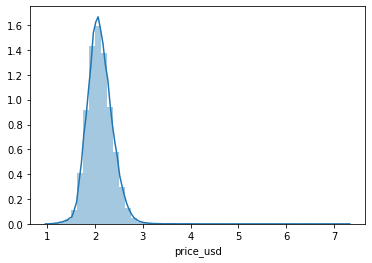

In [40]:
# log10 representation of price_usd column
sns.distplot(np.log10(df.price_usd))

In [38]:
# Length where price is lower than 10$
len(df[df['price_usd'] < 10])

3081

In [60]:
# per_night column condition function
def per_night(row):
    if row.price_usd > 150000:
        if row.srch_children_count > 0:
            person_count = row.srch_adults_count + row.srch_children_count * 0.5
            return row.price_usd / (row.srch_length_of_stay * person_count)
        else:
            return row.price_usd / (row.srch_length_of_stay * row.srch_adults_count)
    return row.price_usd

In [61]:
df['per_night_per_room'] = df.apply(per_night, axis=1)

In [62]:
# sample of prices where they are higher than the most expensive hotel with certain column list
df[(df.price_usd > 150000)].sample(n=20)[['srch_length_of_stay', 'srch_room_count','srch_adults_count',
                                          'srch_children_count', 'per_night_per_room', 'price_usd']]

,srch_length_of_stay,srch_room_count,srch_adults_count,srch_children_count,per_night_per_room,price_usd
3795213,1,1,2,0,85411.000000,170822.00
3069343,2,2,2,0,63217.250000,252869.00
3069339,2,2,2,0,38381.750000,153527.00
2721059,2,1,2,0,41014.390000,164057.56
314035,7,1,2,1,31036.943429,543146.51
3069345,2,2,2,0,65475.000000,261900.00
4314545,2,1,2,1,47760.000000,238800.00
314053,7,1,2,1,25769.897143,450973.20
1964206,1,1,2,0,734428.000000,1468856.00
1964201,1,1,2,0,236523.000000,473046.00


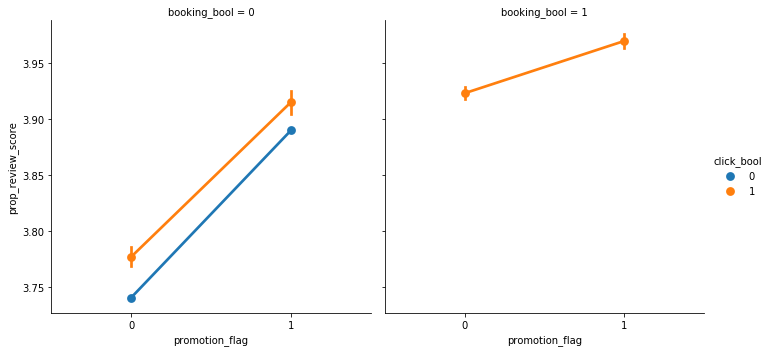

In [6]:
# fig, ax = plt.subplots(figsize=(20, 10))
# the effect of promotion while there is/n't booking and clicking
sns.catplot(x='promotion_flag',
            y='prop_review_score',
            hue='click_bool',
            col='booking_bool',
            kind='point',
            data=df)
# sns.boxplot(x='prop_country_id', y='prop_review_score', hue='booking_bool', data=df)

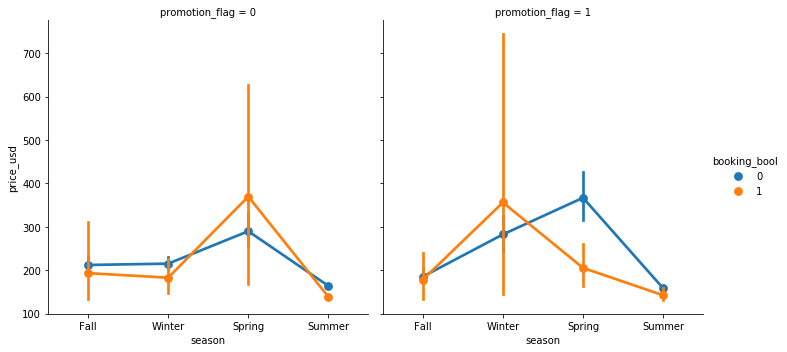

In [9]:
# Visualize price_usd by season
# the effect of each season to price while there is/n't promotion and booking
sns.catplot(x='season',
            y='price_usd',
            col='promotion_flag',
            hue='booking_bool',
            order=['Fall', 'Winter', 'Spring', 'Summer'],
            kind='point',
            data=df
           )

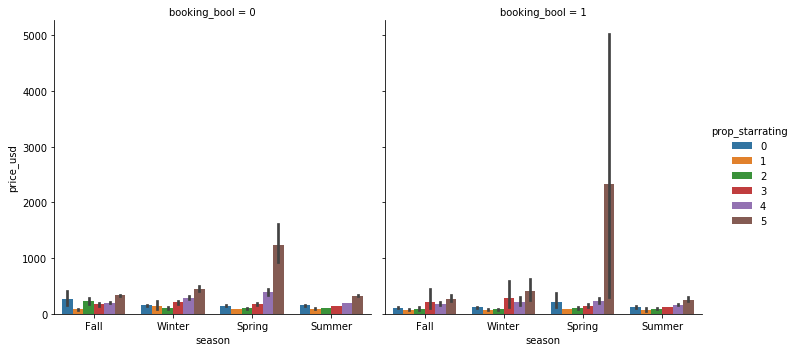

In [12]:
# the effect of each season to price while there is/n't promotion with different star ratings
sns.catplot(x='season',
            y='price_usd',
            hue='prop_starrating',
            order=['Fall', 'Winter', 'Spring', 'Summer'],
            col='booking_bool',
            kind='bar',
            data=df
           )

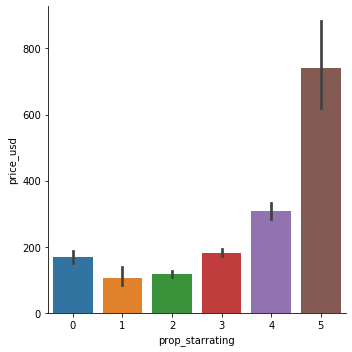

In [3]:
# the effect of star rating to price
sns.catplot(x='prop_starrating',
            y='price_usd',
            order=[0, 1, 2, 3, 4, 5],
            kind='bar',
            data=df
           )

In [10]:
len(df[df['price_usd'] > 500]['prop_id'].unique())

11939

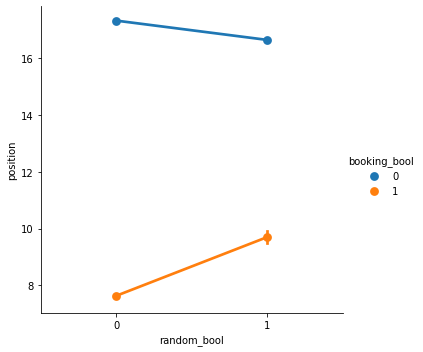

In [29]:
# the effect of random display to position with/out booking
sns.catplot(x='random_bool',
            y='position',
            hue='booking_bool',
            kind='point',
            data=df)

In [13]:
# range of price_usd column
df['price_usd'].min(), df['price_usd'].max()

(0.0, 19726328.0)

In [24]:
# specific observation for the price where it is more expensive than the most expensive hotel in records
df[df['price_usd'] == 19726328.0][['prop_id', 'srch_length_of_stay', 'srch_room_count',
                 'srch_adults_count', 'with_family', 'season', 'price_usd']]

,prop_id,srch_length_of_stay,srch_room_count,srch_adults_count,with_family,season,price_usd
1168566,39677,4,1,2,1,Spring,19726328.0


In [28]:
df[df['prop_id'] == 39677][['srch_length_of_stay', 'srch_room_count', 'price_usd']].mean()

srch_length_of_stay        2.832061
srch_room_count            1.125954
price_usd              75970.270191
dtype: float64

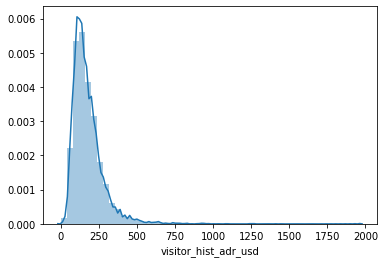

In [32]:
# each users previous spending to hotel stays
sns.distplot(sub['visitor_hist_adr_usd'])

In [41]:
# the percentage of the users where they spent more than
# 400$ per night in average in their previous records
high_pay_hist = sub[sub['visitor_hist_adr_usd'] > 400]
100 * len(high_pay_hist) / len(sub)

3.353518743972046